# Brain Images Visualization #
### Here we use nilearn to visualize braim MRI images

In [4]:
from nilearn import image
from nilearn import plotting
import numpy as np
import matplotlib as plt
import os
import pathlib
import warnings
warnings.filterwarnings("ignore")

## Importing an image

In [5]:
img = image.load_img('./data1.nii') 

#print(img.header)
# Affine transform matrix, in 3D it is a 4by4 matrix, translation and rotation
print('Affine transform matrix = \n',img.affine )

# Shape of img: 256 by 256 by 170
print('\n','Shape of image matrix = ',img.shape)

# getting the value of color at matrix element 100,100,1
print('\n','image color value at location [100,10,1] = ', img.get_data()[100,10,1])

# getting the color data for all the elements of the matrix
allColors = img.get_data()[:,:,:]

# finding the maximum and minimum value of the color data of the image
print('\n','max =', np.max(allColors), ', min =', np.min(allColors))

Affine transform matrix = 
 [[  3.42160824e-08   2.62855434e-04  -1.20317491e+00   9.91207504e+01]
 [ -2.61549173e-04  -1.00463896e+00  -3.14800703e-04   1.40500000e+02]
 [ -9.99635960e-01   2.62858189e-04   4.11829240e-08   1.32552368e+02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]

 Shape of image matrix =  (256, 256, 170)

 image color value at location [100,10,1] =  0.00121789

 max = 851.914 , min = 0.0


## Loading an image and saving different type of its plottings

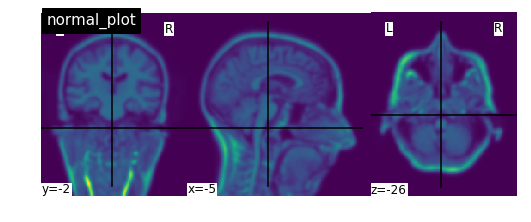

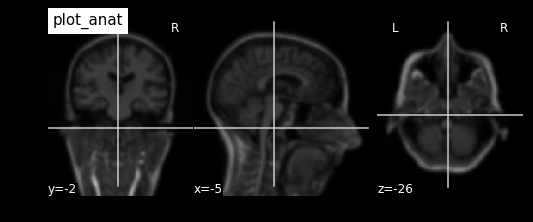

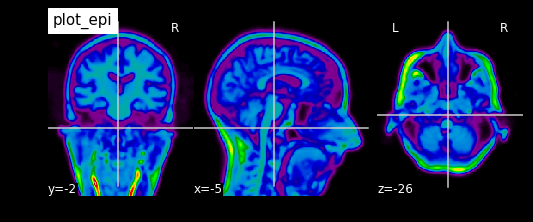

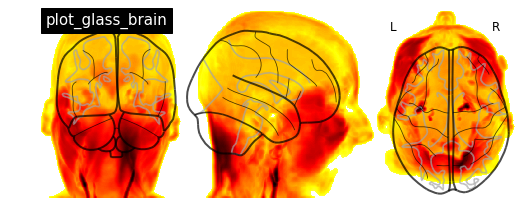

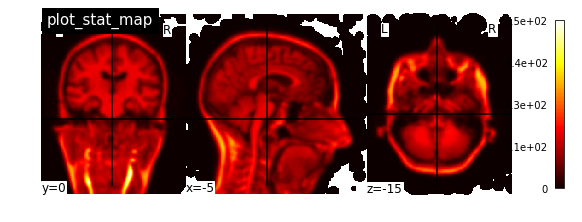

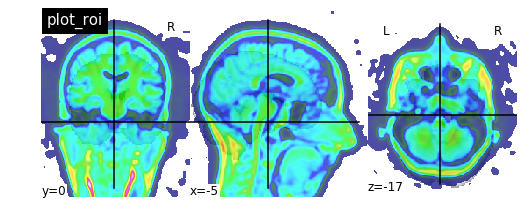

In [6]:
# loading an image and plotting it using different type of plotting function

pathlib.Path('./images/saved_images/different_Plot_Types').mkdir(parents=True, exist_ok=True)  # cheks to see if a directory names "saved_images" does not exits, makes it
new_path = os.path.join(os.getcwd(), "images/saved_images/different_Plot_Types"+'/.')

plotting.plot_img(img, title = "normal_plot").savefig(new_path + 'normal_plot.png')
plotting.plot_anat(img, title = "plot_anat").savefig(new_path +  'plot_anat.png') 
plotting.plot_epi(img, title = "plot_epi").savefig(new_path + 'plot_epi.png')
plotting.plot_glass_brain(img, title = "plot_glass_brain").savefig(new_path + 'plot_glass_brain.png')
plotting.plot_stat_map(img, title = "plot_stat_map").savefig(new_path + 'plot_stat_map.png')
plotting.plot_roi(img, title = "plot_roi").savefig(new_path + 'plot_roi.png')

plotting.show()

## Smoothing an image with varying amount of smoothing and saving them


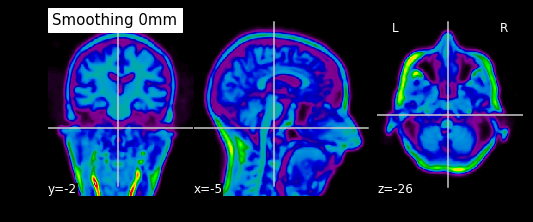

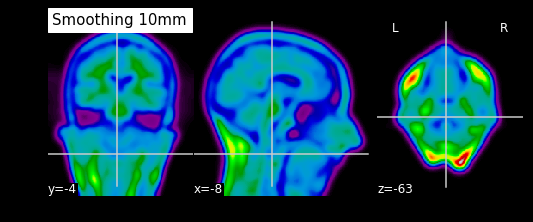

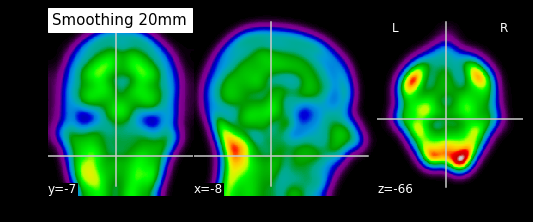

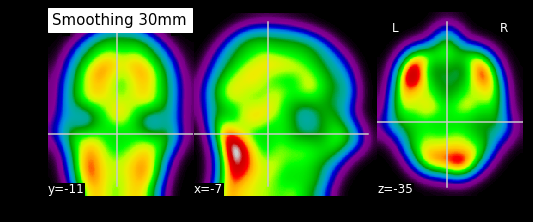

In [7]:
# First we compute the mean image, from the 4D series of image, but here we have only 3D, so taking mean does not give anything further
mean_func = image.mean_img(img)

pathlib.Path('./images/saved_images/smoothed_images').mkdir(parents=True, exist_ok=True)  # cheks to see if a directory names "smoothed_images" does not exits, makes it
new_path = os.path.join(os.getcwd(), "images/saved_images/smoothed_images" + '/.')

# Then we smooth, with a varying amount of smoothing, from none to 30mm by increments of 10mm
# If fwhm is None or zero, no filtering is performed
for smoothing in range(0, 40, 10):
    smoothed_img = image.smooth_img(mean_func, smoothing)
    plotting.plot_epi(smoothed_img, title="Smoothing %imm" % smoothing).savefig(new_path + 'smoothed_img_level_' + str(smoothing) + '.png')
    
plotting.show()

## Visualizing in - ‘sagittal’, ‘coronal’ and ‘axial’ for a certain cut-coordinates

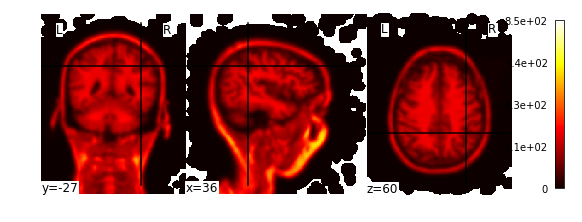

In [8]:
plotting.plot_stat_map(img, display_mode='ortho', cut_coords=[36, -27, 60])
plotting.show()

## Visualizing in - single view ‘sagittal’ with only two slices

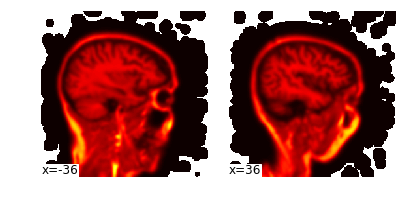

In [9]:
plotting.plot_stat_map(img, display_mode='x', cut_coords=[-36, 36], colorbar=False)
plotting.show()

## Visualize in - two views ‘sagittal’ and ‘axial’ with given coordinates

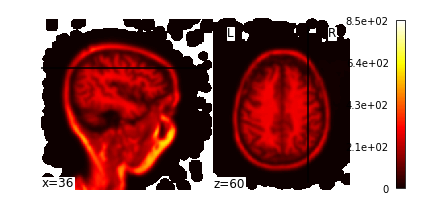

In [10]:
plotting.plot_stat_map(img, display_mode='xz', cut_coords=[36, 60])
plotting.show()

## Adding edges

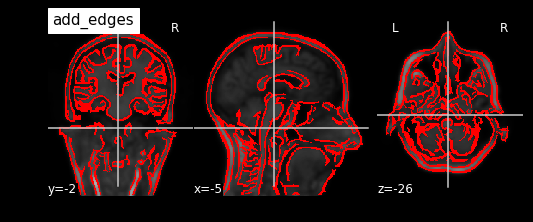

In [11]:
plotting.plot_anat(image.mean_img(img), title="add_edges").add_edges(img)
plotting.show()

## Adding contours

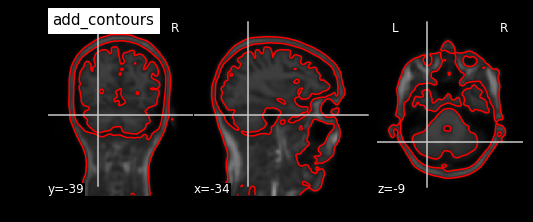

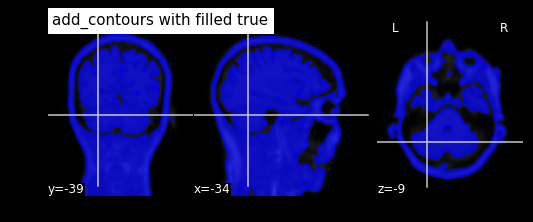

In [12]:
plotting.plot_anat(image.mean_img(img), title="add_contours", cut_coords=[-34, -39, -9]).add_contours(img, levels=[150], colors='r')
plotting.plot_anat(image.mean_img(img), title="add_contours with filled true", cut_coords=[-34, -39, -9]).add_contours(img, filled=True, alpha=0.7, levels=[150], colors='b')
plotting.show()

## Plotting seeds using add_markers

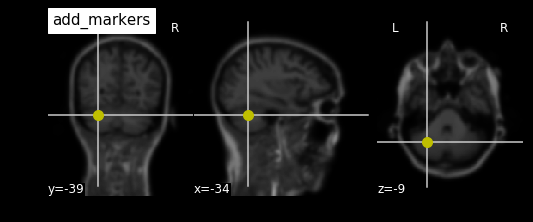

In [13]:
coords = [(-34, -39, -9)]
plotting.plot_anat(image.mean_img(img), title="add_markers", cut_coords=[-34, -39, -9]).add_markers(coords, marker_color='y', marker_size=100)
plotting.show()

## Plotting different image threshholds

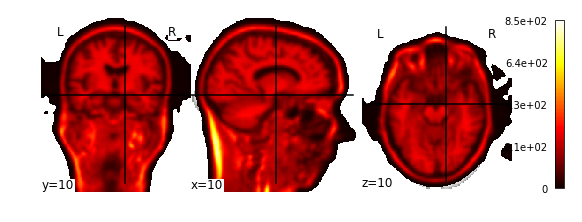

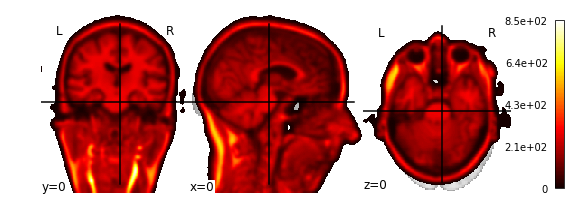

In [14]:
plotting.plot_stat_map(img, display_mode = 'ortho', cut_coords = [10, 10, 10.7], threshold = 4)
plotting.plot_stat_map(img, display_mode = 'ortho', cut_coords = [0, 0, 0], threshold = 12)

plotting.show()